<a href="https://colab.research.google.com/github/AlienX77-cmd/Computational-Finance/blob/main/Computational_Finance_Homework_5_VaR_ES_6310505688_Kittipak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Kittipak Wibulsthien 6310505688
# กิตติภัค วิบูลเสถียร 6310505688

import pandas as pd
import numpy as np
import scipy
import yfinance as yf
import time


%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
start_date = '2020-01-01'
end_date = '2022-12-31'

df= yf.download('PTT.BK', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [62]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26,31.50,32.25,31.50,32.25,30.768049,39661000
2022-12-27,32.50,32.75,32.25,32.50,31.006561,80790200
2022-12-28,32.50,32.75,32.25,32.75,31.245071,49817800
2022-12-29,32.75,33.00,32.50,32.75,31.245071,61347100
2022-12-30,33.00,33.50,32.75,33.25,31.722097,94398400


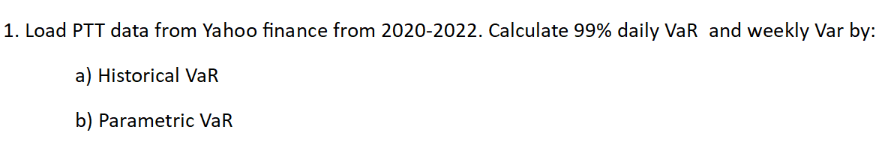

###**Calculate Daily Return**

In [63]:
df['Daily Returns'] = df['Adj Close'].pct_change()

###**a) Historical VaR**

In [64]:
Alpha = 0.01  # 99% confidence level
Hist_VaR_Daily = df['Daily Returns'].quantile(Alpha)
Hist_VaR_Weekly = df['Daily Returns'].quantile(Alpha) * np.sqrt(5)  # Assuming 5 trading days in a week

In [65]:
print("Daily Historical VaR:", Hist_VaR_Daily.round(4)); print("Weekly Historical VaR:", Hist_VaR_Weekly.round(4))

Daily Historical VaR: -0.0504
Weekly Historical VaR: -0.1127


###**b) Parametric VaR**

Parametric VaR is based on the assumption that the returns of a financial instrument follow a specific distribution, often assumed to be normal (Gaussian). The formula for Parametric VaR is:

Parametric_VaR = μ + (z×σ)

Where:

    μ is the mean (average) of the returns.
    σ is the standard deviation of the returns.
    z is the z-score corresponding to the desired confidence level.

In [66]:
Mean_Return = df['Daily Returns'].mean() # calculate mean
STD = df['Daily Returns'].std() # calculate standard deviation

z_score = np.percentile(np.random.normal(0, 1, 10000), Alpha * 100) # np.random.normal(0, 1, 10000) generates a random sample from a standard normal distribution. The z_score is then calculated using the desired confidence level (alpha). The Parametric VaR is computed using the mean and standard deviation of the historical daily returns.
Para_VaR_Daily = Mean_Return + (z_score * STD)
Para_VaR_Weekly = Para_VaR_Daily * np.sqrt(5) # Assuming 5 trading days in a week

In [67]:
print("Daily Parametric VaR:", Para_VaR_Daily.round(4)); print("Weekly Parametric VaR:", Para_VaR_Weekly.round(4))

Daily Parametric VaR: -0.0481
Weekly Parametric VaR: -0.1076


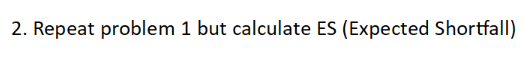

###**Expected Shortfall**
Expected Shortfall (ES), also known as Conditional Value at Risk (CVaR), is the expected value of the loss given that it exceeds the Value at Risk (VaR). It provides a more comprehensive measure of risk compared to VaR. In practice, ES is often estimated empirically by taking the average of the worst-case losses beyond the VaR threshold

Reference: https://medium.datadriveninvestor.com/how-to-measure-the-expected-shortfall-of-a-stock-investment-in-python-bfdfccf194d0


In [68]:
ES_daily = df['Daily Returns'][df['Daily Returns'] <= Hist_VaR_Daily].mean()
ES_weekly = df['Daily Returns'][df['Daily Returns'] <= Hist_VaR_Weekly].mean()

In [69]:
print("Daily Expected Shortfall:", ES_daily.round(4)); print("Weekly Expected Shortfall:", ES_weekly.round(4))

Daily Expected Shortfall: -0.0909
Weekly Expected Shortfall: -0.2533


In [70]:
# The End